# Kolmogorov-Smirnov Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [27]:
# Create random samples
norm_a = np.random.normal(loc = 0, scale = 1, size = 500)
norm_b = np.random.normal(loc = 0.1, scale = 3, size = 500)

In [28]:
norm_a.sort()
norm_b.sort()

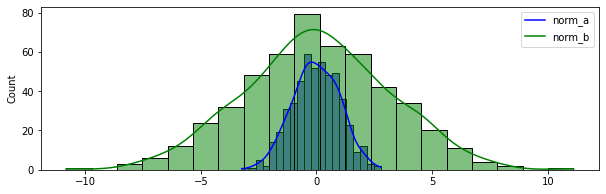

In [29]:
# Visualize them
plt.figure(figsize = (10,3))
sns.histplot(norm_a, bins = 20, kde = True, color = 'b')
sns.histplot(norm_b, bins = 20, kde = True, color = 'g')
plt.legend(["norm_a", "norm_b"])

In [30]:
def cdf(sample, x, sort = False):
    '''
    Return the value of the Cumulative Distribution Function, evaluated for a given sample and a value x.
    
    Args:
        sample: The list or array of observations.
        x: The value for which the numerical cdf is evaluated.
    
    Returns:
        cdf = CDF_{sample}(x)
    '''
    
    # Sorts the sample, if needed
    if sort:
        sample.sort()
    
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    
    return cdf

In [31]:
# Creates their CDFs for visualization
cdf_norm_a = np.array([cdf(norm_a, x, sort = True) for x in norm_a])
cdf_norm_b = np.array([cdf(norm_b, x, sort = True) for x in norm_b])

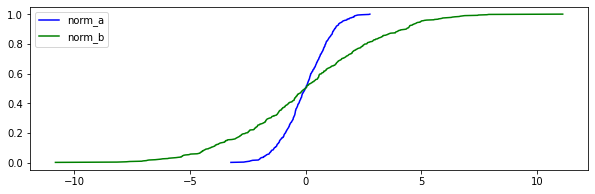

In [32]:
# Visualize them
plt.figure(figsize = (10,3))
sns.lineplot(x = norm_a, y = cdf_norm_a, color = 'b')
sns.lineplot(x = norm_b, y = cdf_norm_b, color = 'g')
plt.legend(["norm_a", "norm_b"])

In [33]:
norm_d = np.random.normal(loc = 0, scale = 5, size = 500)
norm_d.sort()
cdf_norm_d = np.array([cdf(norm_d, x, sort = True) for x in norm_d])

Text(0.5, 1.0, 'Kolmogorov-Smirnov Test')

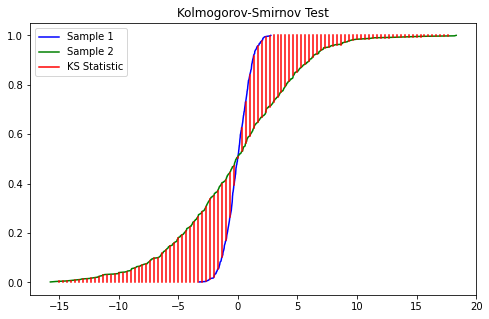

In [34]:
plt.figure(figsize = (8,5))
sns.lineplot(x = norm_a, y = cdf_norm_a, color = 'b')
sns.lineplot(x = norm_d, y = cdf_norm_d, color = 'g')
min_x = int(min(min(norm_a), min(norm_d)))
max_x = int(max(max(norm_a), max(norm_d)))
for i in range(min_x * 3, max_x * 3):
    j = i/3
    plt.plot([j, j], [cdf(norm_a, j), cdf(norm_d, j)], color = 'r')
plt.legend(["Sample 1", "Sample 2", "KS Statistic"])
plt.title("Kolmogorov-Smirnov Test")

In [35]:
def standardize(sample):
    
    # Standardize the data
    mean = sample.mean()
    std = sample.std()
    sample_z = (sample - mean)/std
    
    return sample_z 

In [36]:
def ks_norm(sample):
    
    # Sorts the sample
    sample.sort()
    
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in sample:
        cdf_normal = stats.norm.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [37]:
# Calculates the KS statistic
# We wish to test for normality, so we want to compare to a normal distribution with mean = 0 and variance = 1.
# We need then to standardize the data. If we don't do that, a normal distribution with other mean or variance will fail the test.
ks_norm_a = ks_norm(standardize(norm_a))
ks_norm_b = ks_norm(standardize(norm_b))

In [38]:
# Prints the result
print(f"norm_a: ks = {ks_norm_a['ks_stat']:.4f} (p-value = {ks_norm_a['p_value']:.3e}, is normal = {ks_norm_a['p_value'] > 0.05})")
print(f"norm_b: ks = {ks_norm_b['ks_stat']:.4f} (p-value = {ks_norm_b['p_value']:.3e}, is normal = {ks_norm_b['p_value'] > 0.05})")

norm_a: ks = 0.0217 (p-value = 9.687e-01, is normal = True)
norm_b: ks = 0.0214 (p-value = 9.726e-01, is normal = True)
